# The economic well being of a Nation is highly driven by the income of the residents of the particular country
''' Census of any country is the backbonre of the democratic system of government,highly affecting the economic sectors.
Data has been always been an important thing for any kind of decision making.when we are using proper facts to assume the things the chances
of correctness and good decision making increases.

The above introduction had an aim to increase the awareness about how the income factor actually has an impact not only
on the personal lives of people, but also an impact on the nation and its betterment.
We will today have a look on the data extracted from the 1994 Census bureau database, 
and try to find insights about how different features have an impact on the income of an individual. 
Though the data is quite old, and the insights drawn cannot be directly used for derivation in the modern world,
but it would surely help us to analyze what role different features play in predicting the income of an individual.'''


'''The prediction task is to determine whether a person makes over $50K a year.
Since the data predicts 2 values (>50K or <=50K), this clearly is a classification problem,
and we will train the classification models to predict the desired outputs.

1. Age — The age of an individual, this ranges from 17 to 90.

2. Workclass — The class of work to which an individual belongs.

3. Fnlwgt — The weight assigned to the combination of features (an estimate of how many people belong to this set of combination)

4. Education — Highest level of education

5. Education_num — Number of years for which education was taken

6. Marital_Status — Represents the category assigned on the basis of marriage status of a person

7. Occupation — Profession of a person

8. Relationship — Relation of the person in his family

9. Race — Origin background of a person

10. Sex — Gender of a person

11. Capital_gain — Capital gained by a person

12. Capital_loss — Loss of capital for a person

13. Hours_per_week — Number of hours for which an individual works per week

14. Native_Country — Country to which a person belongs

Output:

1. Income — The target variable, which predicts if the income is higher or lower than 50K$.'''

The dataset has 14 independent features whereas 1 dependent variables(labelled feature)

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [3]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
data.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


# EDA

In [5]:
data.shape

(32560, 15)

Total of 32560 rows and 15 columns

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Its visible that the dataset has both numerical (6 columns) and categorical data( 9 columns)

In [7]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [8]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

It shows that the dataset is not having any null values

In [9]:
data.tail(20)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K
32541,72,?,129912,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,25,United-States,<=50K
32542,45,Local-gov,119199,Assoc-acdm,12,Divorced,Prof-specialty,Unmarried,White,Female,0,0,48,United-States,<=50K
32543,31,Private,199655,Masters,14,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K
32544,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32545,37,Private,198216,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K
32546,43,Private,260761,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K
32547,65,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K
32548,43,State-gov,255835,Some-college,10,Divorced,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,<=50K
32549,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K


WE DONT HAVE ANY NULL VALUES BUT IT IS OBSERVED THAT THE DATA HAS SOME ? IN THE DATASET 

In [10]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Observation:
    There is much range in some of the columns in the dataset such as Age,Fnlwgt,capital gain,capital loss,hours per week.
    There are outliers expected in some columns like capital gain and capital loss and also in Fnlwgt.
    

In [11]:
# Count the values in Labelled feature

data['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

Shows a huge difference between the result Income feature ,hence we can say that the target variable is having imbalance dataset.

# Create a displot of all numerical values

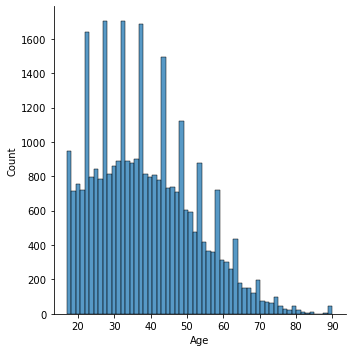

In [12]:

sns.displot(data.Age)

# THe data is right skewed

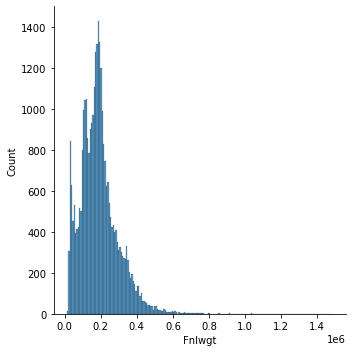

In [13]:
sns.displot(data.Fnlwgt)

It is also right skewed

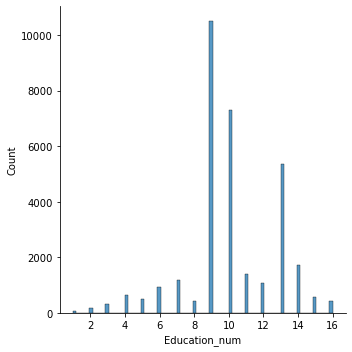

In [14]:
sns.displot(data.Education_num,)

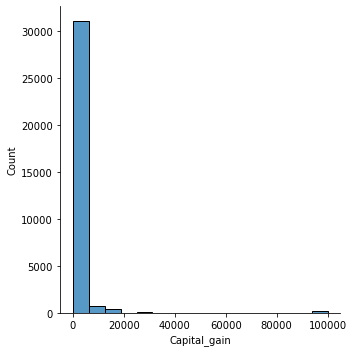

In [15]:
sns.displot(data.Capital_gain)

Too much variation in data is observed

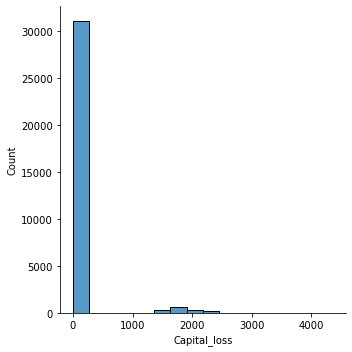

In [16]:
sns.displot(data.Capital_loss)

Too much variation in data is observed in capital loss as well

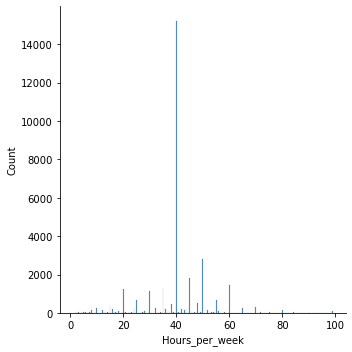

In [17]:
sns.displot(data.Hours_per_week)

Most of the values have data near 40 hours and hence a highest peak  at 40

# Create some visualization of categorical variables and its distribution

In [18]:
data['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

High value of data is defined as ? in workclass column

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Workclass', ylabel='count'>

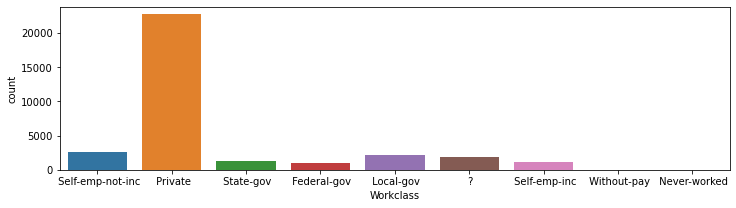

In [19]:
plt.figure(figsize=(12,3))
sns.countplot(data['Workclass'])

# its seen that private job person are comparatively higher in number. 

In [20]:
data['Education'].value_counts()



 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

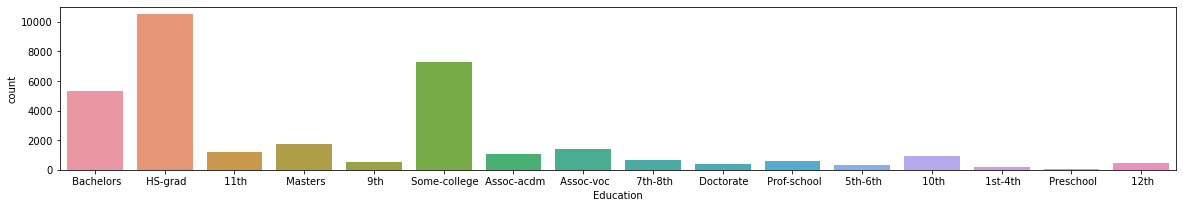

In [21]:
plt.figure(figsize=(20,3))
sns.countplot(data['Education'])

Most of the people have education level as higher secondary, then college and then bachelors

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital_status', ylabel='count'>

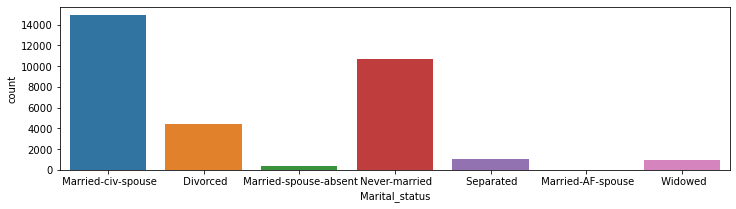

In [22]:
plt.figure(figsize=(12,3))
sns.countplot(data['Marital_status'])

most of the people have Marital_Status as Married-civ-spouse

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' ?'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Armed-Forces'),
  Text(14, 0, ' Priv-house-serv')])

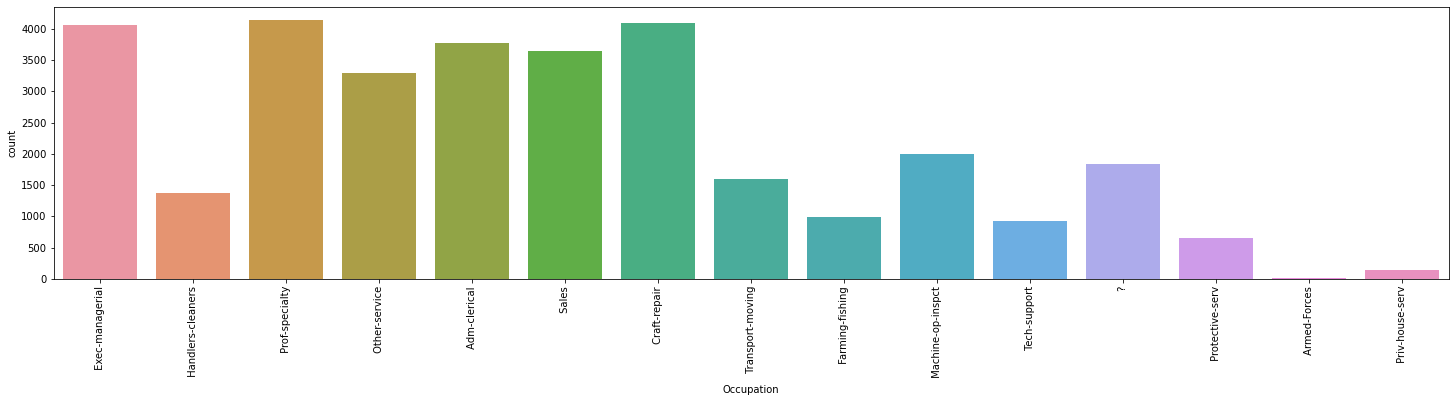

In [23]:
plt.figure(figsize=(25,5))
sns.countplot(data['Occupation'])
plt.xticks(rotation=90)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Husband'),
  Text(1, 0, ' Not-in-family'),
  Text(2, 0, ' Wife'),
  Text(3, 0, ' Own-child'),
  Text(4, 0, ' Unmarried'),
  Text(5, 0, ' Other-relative')])

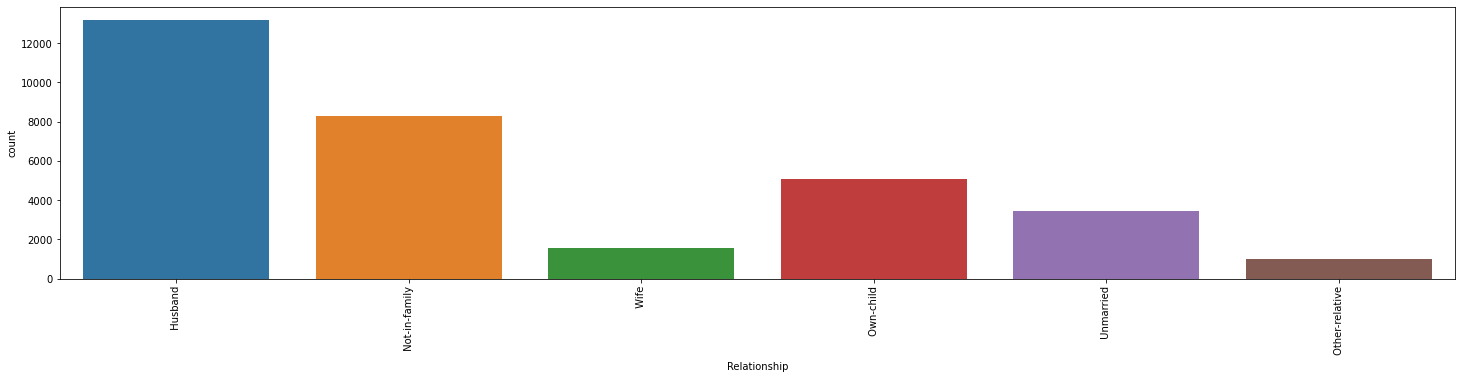

In [24]:
plt.figure(figsize=(25,5))
sns.countplot(data['Relationship'])
plt.xticks(rotation=90)

Husband having high relation and other relatives as least relationship

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


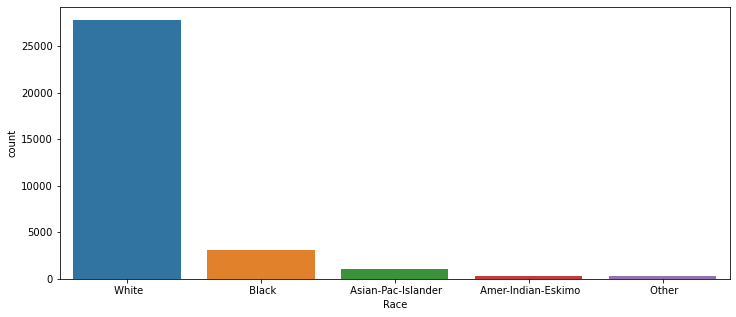

In [25]:
plt.figure(figsize=(12,5))
sns.countplot(data['Race'])
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

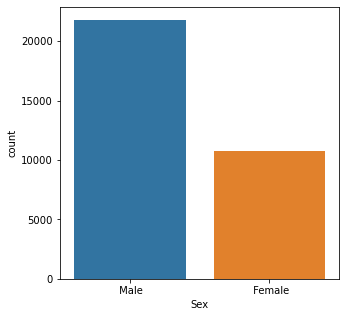

In [26]:
plt.figure(figsize=(5,5))
sns.countplot(data['Sex'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, ' United-States'),
  Text(1, 0, ' Cuba'),
  Text(2, 0, ' Jamaica'),
  Text(3, 0, ' India'),
  Text(4, 0, ' ?'),
  Text(5, 0, ' Mexico'),
  Text(6, 0, ' South'),
  Text(7, 0, ' Puerto-Rico'),
  Text(8, 0, ' Honduras'),
  Text(9, 0, ' England'),
  Text(10, 0, ' Canada'),
  Text(11, 0, ' Germany'),
  Text(12, 0, ' Iran'),
  Text(13, 0, ' Philippines'),
  Text(14, 0, ' Italy'),
  Text(15, 0, ' Poland'),
  Text(16, 0, ' Columbia'),
  Text(17, 0, ' Cambodia'),
  Text(18, 0, ' Thailand'),
  Text(19, 0, ' Ecuador'),
  Text(20, 0, ' Laos'),
  Text(21, 0, ' Taiwan'),
  Text(22, 0, ' Haiti'),
  Text(23, 0, ' Portugal'),
  Text(24, 0, ' Dominican-Republic'),
  Text(25, 0, ' El-Salvador'),
  Text(26, 0, ' France'),
  Text(27, 0, ' Guatemala'),
  Text(28, 0, ' China'),
  Text(29, 0, ' Japan'),
  

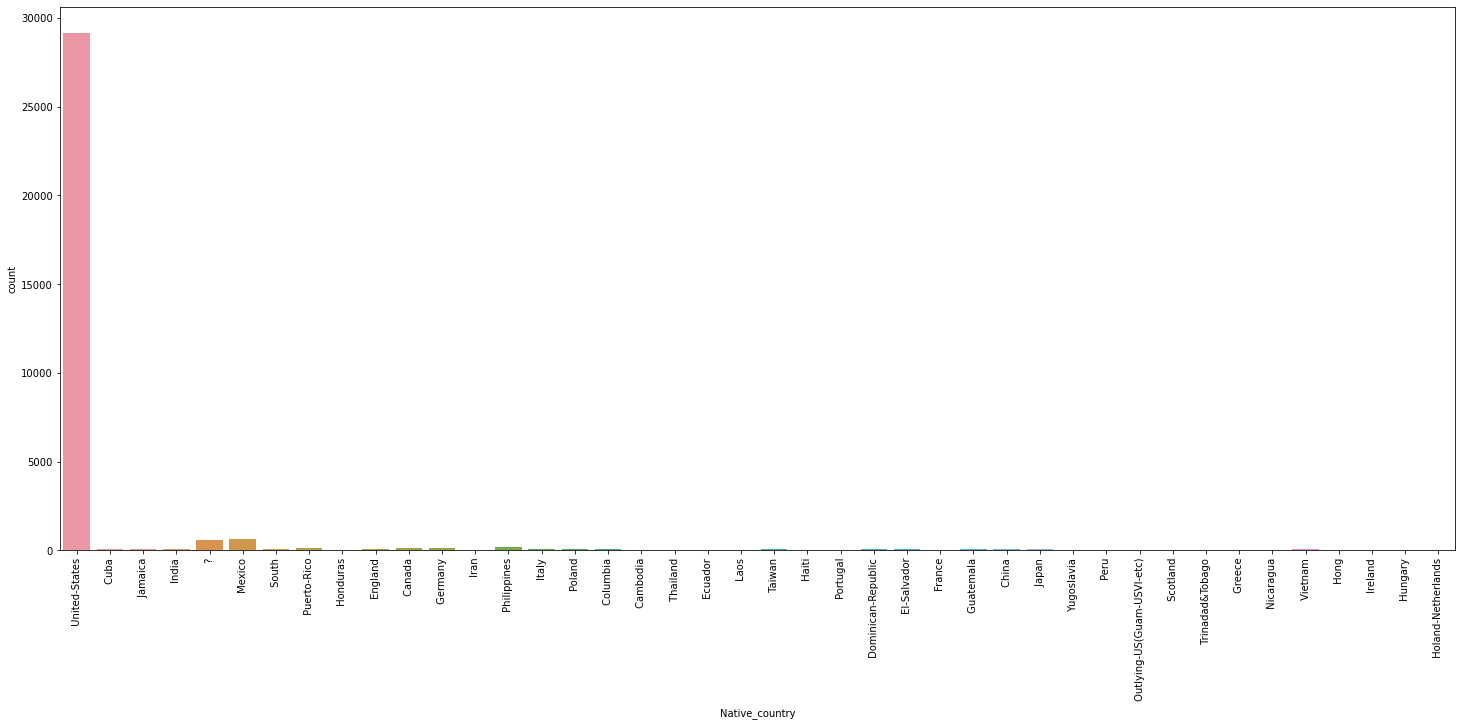

In [27]:
plt.figure(figsize=(25,10))
sns.countplot(data['Native_country'])
plt.xticks(rotation=90)

United state is having highest data

<AxesSubplot:xlabel='Workclass', ylabel='count'>

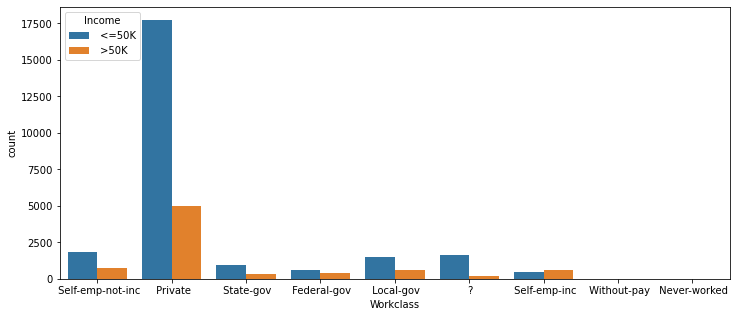

In [28]:
# Now we will checking the relationship with Income
plt.figure(figsize=(12,5))
sns.countplot(x='Workclass',data=data,hue='Income')

# It is observed that private job people are having mostly high income

It is observed that private job people are having mostly high income

<AxesSubplot:xlabel='Education', ylabel='count'>

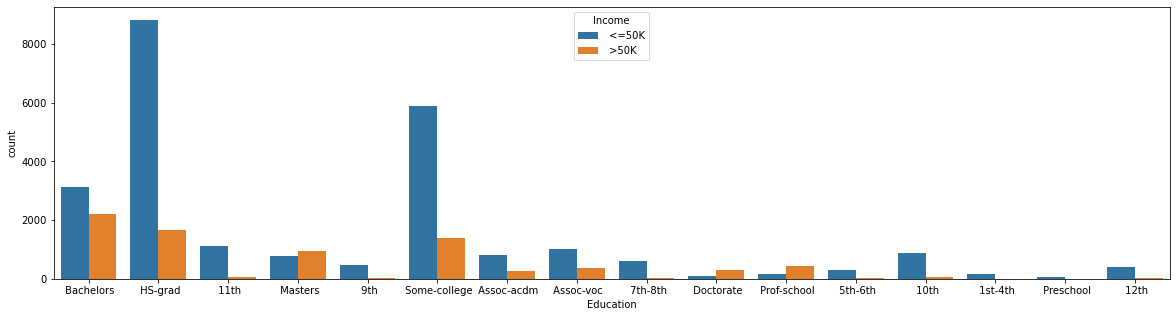

In [29]:
# Now we will checking the relationship with Income
plt.figure(figsize=(20,5))
sns.countplot(x='Education',data=data,hue='Income')

It is observed thatHS grad,then college and then bachelors are having mostly high income

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

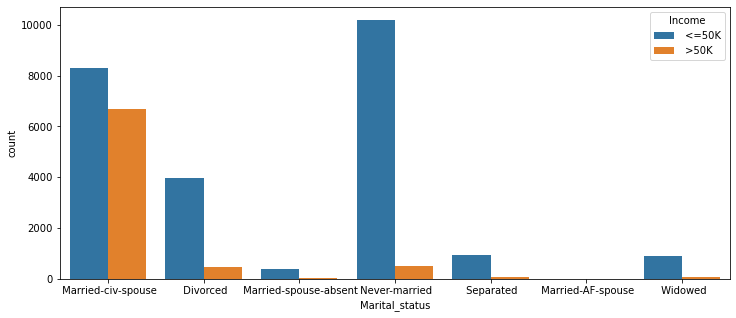

In [30]:
# Now we will checking the relationship with Income
plt.figure(figsize=(12,5))
sns.countplot(x='Marital_status',data=data,hue='Income')

Never married people is having highest income in the data followed by married with spouse

<AxesSubplot:xlabel='Sex', ylabel='count'>

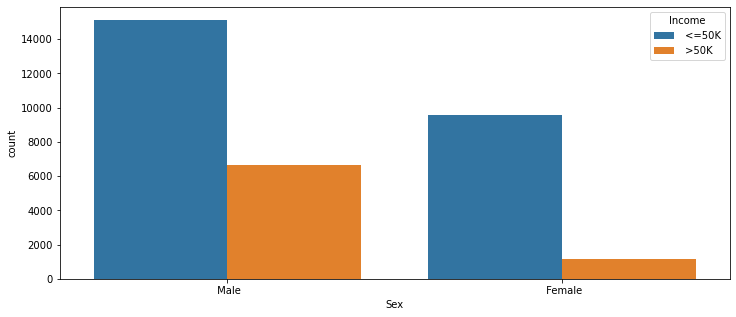

In [31]:
plt.figure(figsize=(12,5))
sns.countplot(x='Sex',data=data,hue='Income')

Male having High income if we compare it in terms of percentage

<AxesSubplot:xlabel='Race', ylabel='count'>

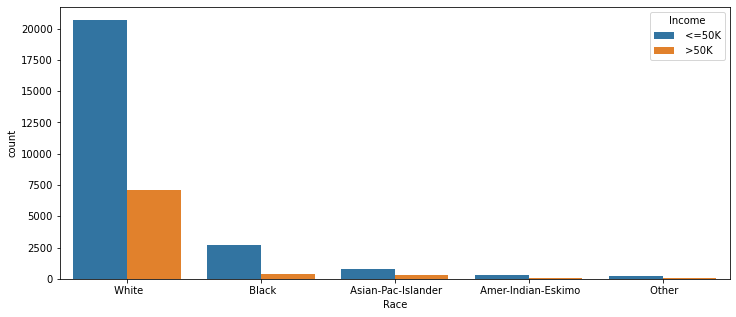

In [32]:
plt.figure(figsize=(12,5))
sns.countplot(x='Race',data=data,hue='Income')

White people are having more income as compared to others

<AxesSubplot:xlabel='Occupation', ylabel='count'>

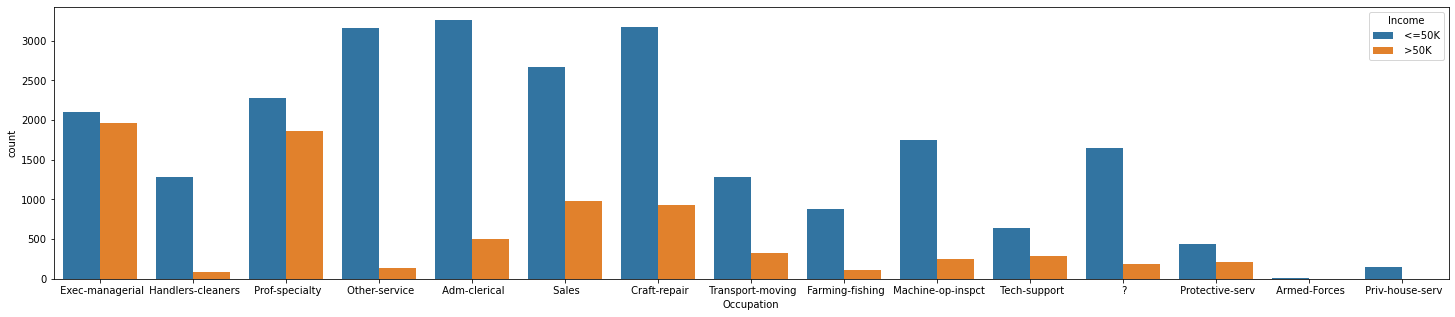

In [33]:
plt.figure(figsize=(25,5))
sns.countplot(x='Occupation',data=data,hue='Income')

<AxesSubplot:xlabel='Native_country', ylabel='count'>

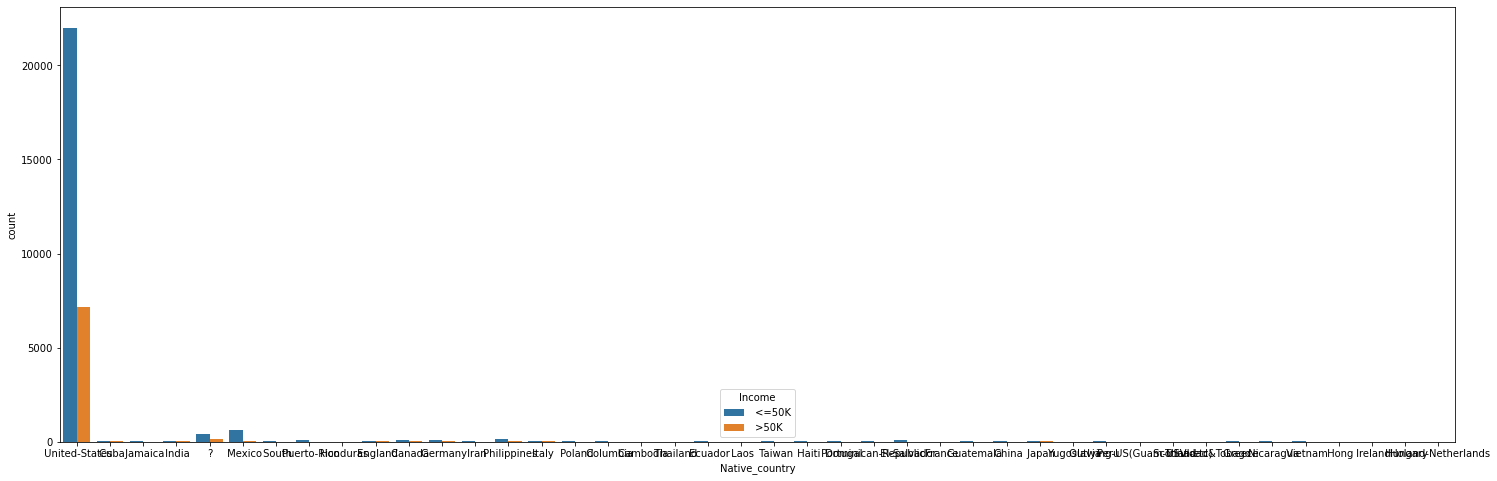

In [34]:
plt.figure(figsize=(25,8))
sns.countplot(x='Native_country',data=data,hue='Income')

<AxesSubplot:>

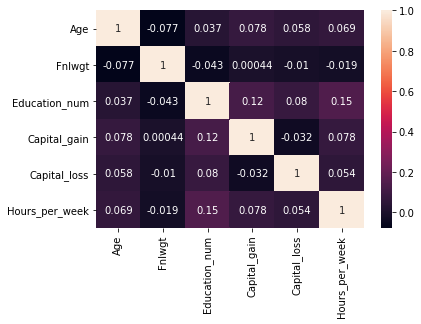

In [35]:
# Lets have a look on correlation of numeric data

sns.heatmap(data.corr(),annot=True)

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Income']=le.fit_transform(data['Income'])

<AxesSubplot:>

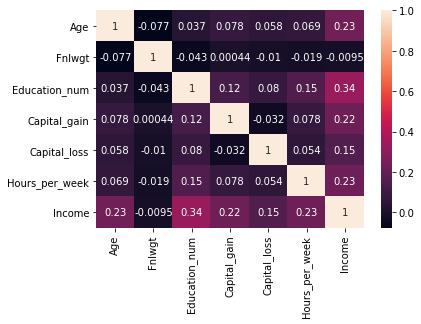

In [37]:
sns.heatmap(data.corr(),annot=True)

Income has 34% correlation with Education_num, 23% correlation with hours_per_week and ag’, 
and 22% correlation with Capital_gai’. 
The correlations are moderate.

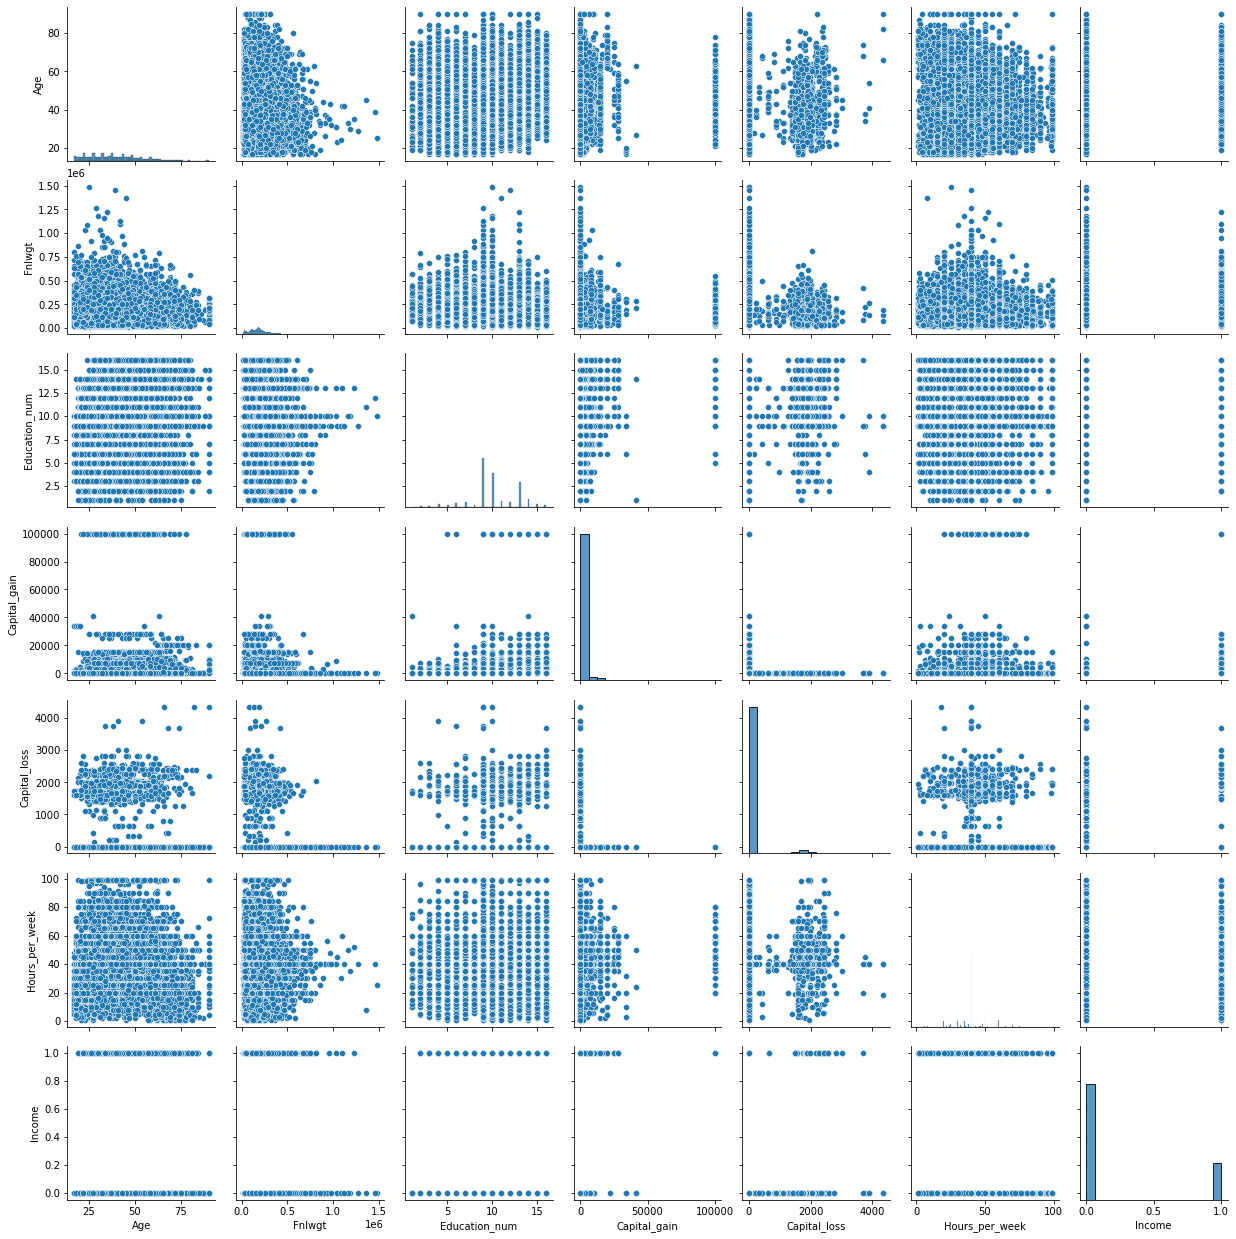

In [38]:
sns.pairplot(data)
plt.show()

In [39]:
# We need to treat skewness
data.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Income             1.212383
dtype: float64

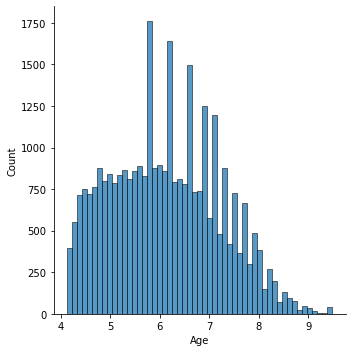

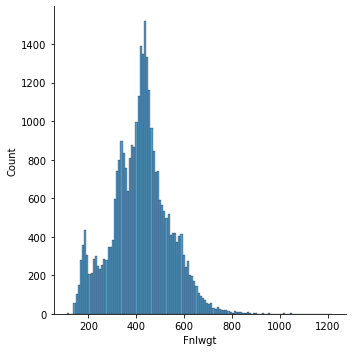

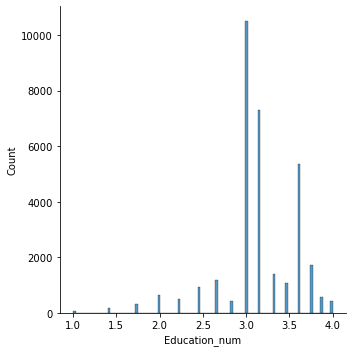

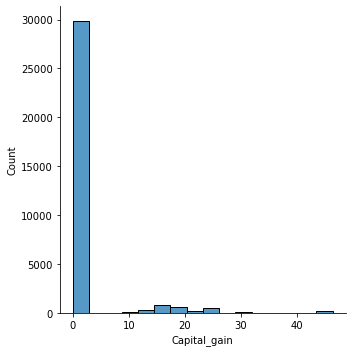

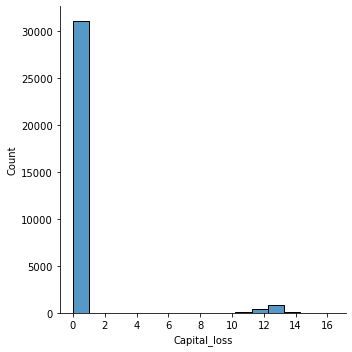

In [40]:
#sns.displot(data.Age)

Age=data['Age']**(0.5)
sns.displot(Age)

Fnlwgt=data['Fnlwgt']**(0.5)
sns.displot(Fnlwgt)

Education_num=data['Education_num']**(0.5)
sns.displot(Education_num)

Capital_gain=data['Capital_gain']**(1/3)
sns.displot(Capital_gain)

Capital_loss=data['Capital_loss']**(1/3)
sns.displot(Capital_loss)



In [41]:
data.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Income             1.212383
dtype: float64

In [42]:
# Encoding the data using Label Encoder


In [43]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [44]:
data['Workclass']=le.fit_transform(data['Workclass'])
data['Education']=le.fit_transform(data['Education'])
data['Marital_status']=le.fit_transform(data['Marital_status'])
data['Occupation']=le.fit_transform(data['Occupation'])
data['Relationship']=le.fit_transform(data['Relationship'])
data['Race']=le.fit_transform(data['Race'])
data['Sex']=le.fit_transform(data['Sex'])
data['Native_country']=le.fit_transform(data['Native_country'])


In [45]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


# Scaling the data 
Scaling the data is required as some columns are having huge range of data

In [46]:
from sklearn .preprocessing import StandardScaler
sc=StandardScaler()

In [47]:
x_c=data.drop('Income',axis=1)
y_c=data['Income']

In [48]:
dataset=sc.fit_transform(x_c)
x=pd.DataFrame(dataset,columns=x_c.columns)

# Now we will be fiiting the model into different types of classification algorithm as  we have identified

In [49]:
# import the libraries for model building

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,roc_curve


In [50]:
x_train,x_test,y_train,y_test=train_test_split(x_c,y_c,test_size=0.2,random_state=40)

In [51]:
print('X-train shape:',x_train.shape)
print('Y-train shape:',y_train.shape)
print('X-test shape:',x_test.shape)
print('Y-test shape:',y_test.shape)

X-train shape: (26048, 14)
Y-train shape: (26048,)
X-test shape: (6512, 14)
Y-test shape: (6512,)


In [52]:
model=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GaussianNB(),KNeighborsClassifier()]
max_accuracy_score=0
for r_state in range(10,20):
    xc_train,xc_test,yc_train,yc_test=train_test_split(x_c,y_c,random_state=r_state,test_size=0.33)
    for i_c in model:
        i_c.fit(xc_train,yc_train)
        pred_c=i_c.predict(xc_test)
        acc_score=accuracy_score(yc_test,pred_c)
        print (" Accuracy score to random state:",r_state,"is",acc_score)
        print('---------------------')
        if acc_score > max_accuracy_score:
            max_accuracy_score=acc_score
            final_state=r_state
            final_model=i_c

print("Final accuracy at random state:",final_state,'is',max_accuracy_score,'with model:',final_model)


 Accuracy score to random state: 10 is 0.7883666821777571
---------------------
 Accuracy score to random state: 10 is 0.8108887854816194
---------------------
 Accuracy score to random state: 10 is 0.8555607259190321
---------------------
 Accuracy score to random state: 10 is 0.7970218706375058
---------------------
 Accuracy score to random state: 10 is 0.798510935318753
---------------------
 Accuracy score to random state: 10 is 0.7733829688227082
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 11 is 0.7853885528152629
---------------------
 Accuracy score to random state: 11 is 0.8090274546300605
---------------------
 Accuracy score to random state: 11 is 0.8534201954397395
---------------------
 Accuracy score to random state: 11 is 0.7937645416472778
---------------------
 Accuracy score to random state: 11 is 0.7973941368078176
---------------------
 Accuracy score to random state: 11 is 0.7758026989297347
---------------------
 Accuracy score to random state: 12 is 0.7849232201023731
---------------------
 Accuracy score to random state: 12 is 0.8093997208003723
---------------------
 Accuracy score to random state: 12 is 0.8569567240577013
---------------------
 Accuracy score to random state: 12 is 0.7879944160074454
---------------------
 Accuracy score to random state: 12 is 0.7892042810609586
---------------------
 Accuracy score to random state: 12 is 0.7741275011633317
---------------------
 Accuracy score to random state: 13 is 0

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 15 is 0.7917170777105631
---------------------
 Accuracy score to random state: 15 is 0.805025593299209
---------------------
 Accuracy score to random state: 15 is 0.8607724523033969
---------------------
 Accuracy score to random state: 15 is 0.7976733364355514
---------------------
 Accuracy score to random state: 15 is 0.8011167985109353
---------------------
 Accuracy score to random state: 15 is 0.7765472312703583
---------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy score to random state: 16 is 0.7936714751046998
---------------------
 Accuracy score to random state: 16 is 0.8099581200558399
---------------------
 Accuracy score to random state: 16 is 0.8570497906002792
---------------------
 Accuracy score to random state: 16 is 0.7959050721265705
---------------------
 Accuracy score to random state: 16 is 0.7965565379246161
---------------------
 Accuracy score to random state: 16 is 0.7713355048859935
---------------------
 Accuracy score to random state: 17 is 0.7982317356910191
---------------------
 Accuracy score to random state: 17 is 0.8111679851093532
---------------------
 Accuracy score to random state: 17 is 0.8534201954397395
---------------------
 Accuracy score to random state: 17 is 0.7911586784550954
---------------------
 Accuracy score to random state: 17 is 0.7941368078175896
---------------------
 Accuracy score to random state: 17 is 0.7750581665891112
---------------------
 Accuracy score to random state: 18 is 0

Random Forest Classifier is giving the best accuracy  at random state 15 

In [53]:
RFC=RandomForestClassifier()
RFC.fit(xc_train,yc_train)
predC=RFC.predict(xc_test)
acu_score=accuracy_score(yc_test,predC)
f1_score=f1_score(yc_test,predC)
print("Accuracy Score:",acu_score*100)
print("F1 score:",f1_score*100)
print("Classification Report:",classification_report(yc_test,predC))
print("Cofusion matrix:",confusion_matrix(yc_test,predC))

Accuracy Score: 85.9004187994416
F1 score: 68.36500313217792
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.94      0.91      8105
           1       0.76      0.62      0.68      2640

    accuracy                           0.86     10745
   macro avg       0.82      0.78      0.80     10745
weighted avg       0.85      0.86      0.85     10745

Cofusion matrix: [[7593  512]
 [1003 1637]]


# Cross Validating

In [54]:
# Cross Validating 

score=cross_val_score(RFC,x_c,y_c,cv=15,scoring="accuracy").mean()
print('Cross_val',score*100)
print('Mean score',score.mean()*100)
print("stand_Score",score.std())

Cross_val 85.74637608865928
Mean score 85.74637608865928
stand_Score 0.0


In [55]:
#  Hyper Tuning the RandomForest model

In [56]:
from sklearn.model_selection import RandomizedSearchCV

In [57]:
n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

In [58]:
param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}


In [59]:
rf_tuned = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(
    estimator=rf_tuned, param_distributions=param_dist, cv=5, random_state=42)

In [60]:
rf_cv = RandomizedSearchCV(
    estimator=rf_tuned, param_distributions=param_dist, cv=5, random_state=42)

In [61]:
rf_cv.fit(xc_train, yc_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=42)

In [62]:
rf_cv.best_score_
rf_cv.best_params_

{'n_estimators': 110, 'max_depth': 40}

In [63]:
rf_best = RandomForestClassifier(max_depth=40, n_estimators=110, random_state=42)

In [64]:
rf_best.fit(xc_train, yc_train)

RandomForestClassifier(max_depth=40, n_estimators=110, random_state=42)

In [65]:
Y_pred_rf_best = rf_best.predict(xc_test)

In [66]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(yc_test, Y_pred_rf_best) * 100, 2))
print(classification_report(yc_test,Y_pred_rf_best))
print("Cofusion matrix:",confusion_matrix(yc_test,Y_pred_rf_best))

Random Forest Classifier:
Accuracy score: 85.78
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      8105
           1       0.76      0.62      0.68      2640

    accuracy                           0.86     10745
   macro avg       0.82      0.78      0.79     10745
weighted avg       0.85      0.86      0.85     10745

Cofusion matrix: [[7593  512]
 [1016 1624]]


In [67]:
# ROC curve

#It is a plot of positive rate(x-axis) versus the true positive rate(y-axis) for different threshhold

In [68]:
pred_probability=RFC.predict_proba(xc_test)[:,1]
pred_probability

array([0.97, 0.28, 0.27, ..., 0.72, 0.  , 0.25])

In [69]:
fpr,tpr,thresholds=roc_curve(yc_test,pred_probability,pos_label=True)
print(fpr)
print("\n")
print(tpr)
print("\n")
print(thresholds)


[0.00000000e+00 0.00000000e+00 1.23380629e-04 3.70141888e-04
 4.93522517e-04 8.63664405e-04 1.35718692e-03 2.34423196e-03
 2.46761258e-03 2.83775447e-03 3.08451573e-03 3.70141888e-03
 4.19494139e-03 4.81184454e-03 5.55212832e-03 6.16903146e-03
 7.40283775e-03 7.77297964e-03 9.00678593e-03 1.01172116e-02
 1.15977791e-02 1.25848242e-02 1.32017273e-02 1.38186305e-02
 1.41887724e-02 1.48056755e-02 1.55459593e-02 1.66563849e-02
 1.77668106e-02 1.86304750e-02 1.96175200e-02 2.12214682e-02
 2.27020358e-02 2.47995065e-02 2.64034547e-02 2.85009254e-02
 2.86243060e-02 3.07217767e-02 3.26958667e-02 3.44231956e-02
 3.45465762e-02 3.63972856e-02 3.82479951e-02 4.03454658e-02
 4.21961752e-02 4.47871684e-02 4.73781616e-02 4.73781616e-02
 4.98457742e-02 5.23133868e-02 5.49043800e-02 5.84824183e-02
 6.05798890e-02 6.31708822e-02 6.68723010e-02 6.98334362e-02
 7.26711906e-02 7.26711906e-02 7.72362739e-02 7.99506477e-02
 8.30351635e-02 8.66132017e-02 9.09315238e-02 9.57433683e-02
 1.00678593e-01 1.040098

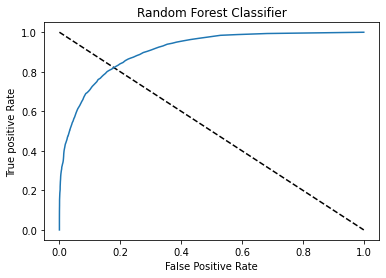

In [70]:
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('Random Forest Classifier')
plt.show()

In [71]:
import pickle

In [72]:
filename="Census Income Prediction Project"
pickle.dump(RFC, open(filename,'wb'))

# Final Observation

We have trained our model succussfully with an accuracy of 85.5% with RandomForest Classifier Algorithm.
We had tuned our model to get best accuracy.